<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/SVR_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all libraires:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import  load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

np.random.seed(42)
plt.rcParams['figure.figsize'] = (6, 4)

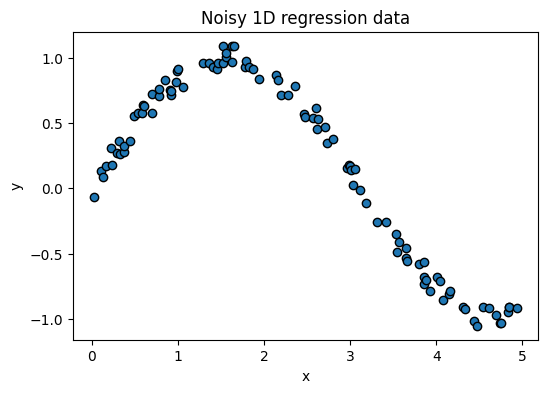

In [2]:
# Create a simple 1D regression dataset
rng = np.random.RandomState(42)
X_reg = np.sort(5 * rng.rand(100, 1), axis=0)
y_reg = np.sin(X_reg).ravel()

# Add some noise
y_reg += 0.2 * (rng.rand(y_reg.shape[0]) - 0.5)

plt.scatter(X_reg, y_reg, edgecolors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy 1D regression data')
plt.show()

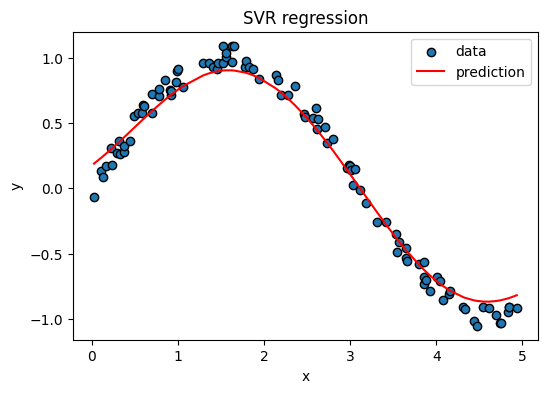

In [5]:
#create a SVR model , tarin the model , make prediction , plot the prediction :
svr_model = SVR(kernel='rbf',C=0.1,epsilon=0.1,gamma='scale')
svr_model.fit(X_reg, y_reg)

y_reg_pred = svr_model.predict(X_reg)


plt.scatter(X_reg, y_reg, edgecolors='k', label='data')
plt.plot(X_reg, y_reg_pred, color='red', label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVR regression')
plt.legend()
plt.show()

In [7]:
#Evaluation of SVR : MSE , R^2
mse = mean_squared_error(y_reg, y_reg_pred)
r2 = r2_score(y_reg,y_reg_pred)
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

MSE: 0.01
R^2: 0.98


##Let's implement SVR for Real Dataset:

In [14]:
#load real world diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

In [15]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_diabetes,y_diabetes,test_size=0.2,random_state=42)

#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
#create model , train and predict
model = SVR(kernel='rbf',C=10,epsilon=0.1,gamma='scale')
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)

print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Squared Error: 2682.387949725229
R2 Score: 0.4937125101265256
